In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
for fam in ["Malgun Gothic", "AppleGothic", "NanumGothic"]:
    try:
        plt.rcParams["font.family"] = fam
        break
    except Exception:
        pass
plt.rcParams["axes.unicode_minus"] = False

In [32]:
def read_csv_any(path: str) -> pd.DataFrame:
    """현재 폴더, ./data, /mnt/data 순으로 CSV 탐색해서 읽기"""
    candidates = [path, os.path.join("data", path), os.path.join("/mnt/data", path)]
    for p in candidates:
        if os.path.exists(p):
            return pd.read_csv(p)
    raise FileNotFoundError(f"CSV를 찾을 수 없음: {path} (검색 경로: {candidates})")

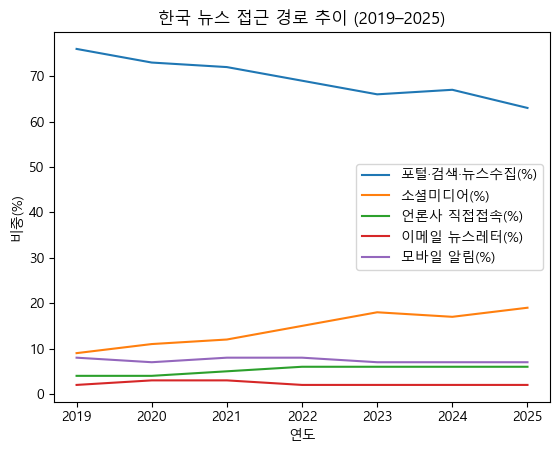

In [15]:
# 1) 연도별 경로 추이 라인차트
tr = pd.read_csv("data/뉴스접근_추이_2019_2025.csv")
tr.plot(
    x="연도",
    y=["포털·검색·뉴스수집(%)","소셜미디어(%)","언론사 직접접속(%)","이메일 뉴스레터(%)","모바일 알림(%)"]
)
plt.title("한국 뉴스 접근 경로 추이 (2019–2025)")
plt.ylabel("비중(%)")
plt.xlabel("연도")
plt.show()

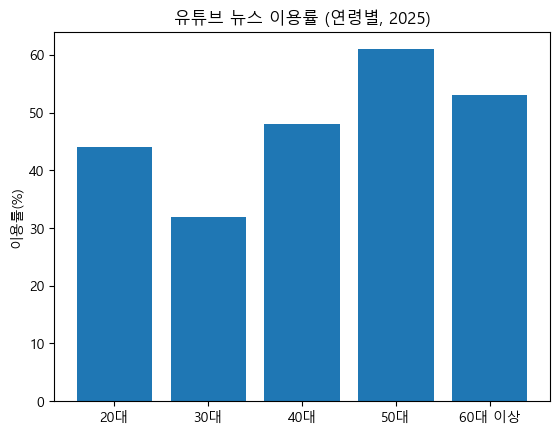

In [12]:
# 2) 2025 유튜브 뉴스 이용률 - 연령 막대그래프
yt = pd.read_csv("data/유튜브_뉴스이용률_연령_정치성향_2025.csv")
age = yt[yt["구분"]=="연령"]
plt.figure()
plt.bar(age["그룹"], age["이용률(%)"])
plt.title("유튜브 뉴스 이용률 (연령별, 2025)")
plt.ylabel("이용률(%)")
plt.show()

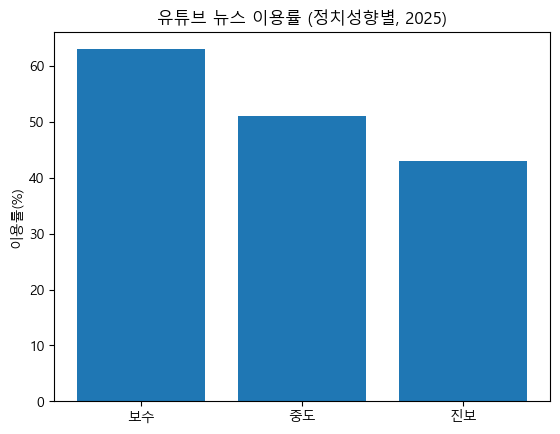

In [13]:
# 3) 2025 유튜브 뉴스 이용률 - 정치성향 막대그래프
pol = yt[yt["구분"]=="정치성향"]
plt.figure()
plt.bar(pol["그룹"], pol["이용률(%)"])
plt.title("유튜브 뉴스 이용률 (정치성향별, 2025)")
plt.ylabel("이용률(%)")
plt.show()

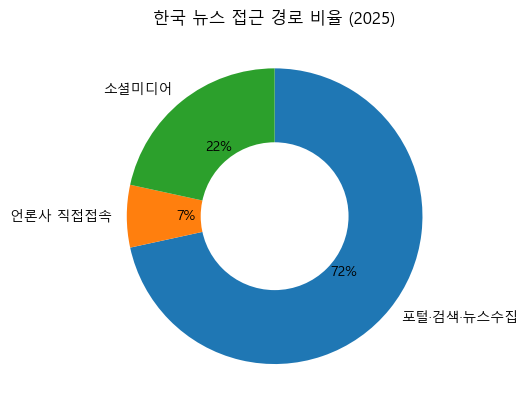

In [14]:
# 4) 2025 뉴스 접근 경로 도넛차트
snap = pd.read_csv("data/뉴스접근_스냅샷_2025.csv")
plt.figure()
wedges, texts, autotexts = plt.pie(
    snap["비중_2025(%)"], 
    labels=snap["경로"], 
    autopct="%1.0f%%", 
    startangle=90, counterclock=False
)
centre = plt.Circle((0,0), 0.5, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title("한국 뉴스 접근 경로 비율 (2025)")
plt.show()

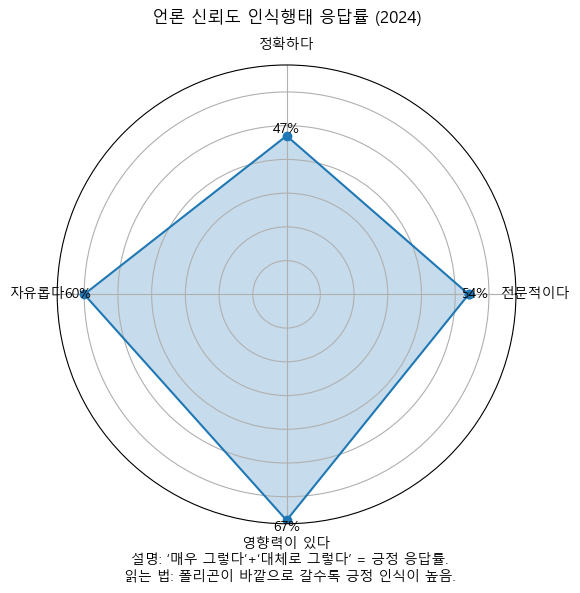

In [37]:
# 1️⃣ 언론 신뢰도 인식 (레이더차트)
df = read_csv_any("언론_신뢰도인식_2024.csv").copy()
# KeyError 방지: 실제 컬럼 확인하고 싶으면 아래 주석 해제
# print(df.columns)

df["긍정(%)"] = df["매우 그렇다(%)"] + df["대체로 그렇다(%)"]
labels = df["항목"].tolist()
vals   = df["긍정(%)"].tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles_c = angles + angles[:1]
vals_c   = vals   + vals[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles_c, vals_c, marker="o")     # 색상 지정 없음(기본)
ax.fill(angles_c, vals_c, alpha=0.25)
ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("언론 신뢰도 인식 (긍정 응답률, 2024)")

# 꼭짓점 수치 주석
for ang, v in zip(angles, vals):
    ax.text(ang, v + 2, f"{v:.0f}%", ha="center", va="center")

plt.title("언론 신뢰도 인식행태 응답률 (2024)", pad=30)
plt.figtext(
    0.5, 0.02,
    "설명: ‘매우 그렇다’+‘대체로 그렇다’ = 긍정 응답률.\n"
    "읽는 법: 폴리곤이 바깥으로 갈수록 긍정 인식이 높음.",
    ha="center", va="bottom"
)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

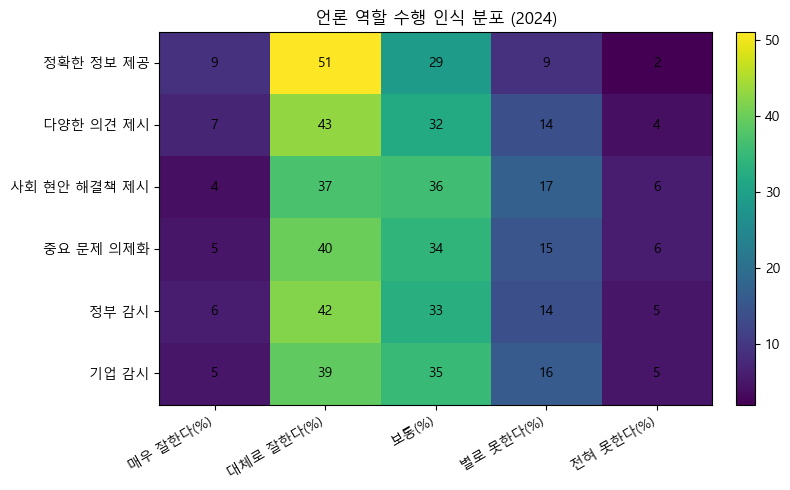

In [34]:
# 2️⃣ 언론 역할 수행 정도 (수평 막대)
df2 = read_csv_any("언론_역할수행정도_2024.csv").copy()
# print(df2.columns)  # 컬럼 확인용

role_labels = df2["역할"].tolist()
grade_cols = ["매우 잘한다(%)","대체로 잘한다(%)","보통(%)","별로 못한다(%)","전혀 못한다(%)"]
M = df2[grade_cols].to_numpy()

plt.figure(figsize=(8, 5))
ax = plt.gca()
im = ax.imshow(M, aspect="auto")  # 기본 colormap(색 지정 없음)
ax.set_yticks(np.arange(len(role_labels)))
ax.set_yticklabels(role_labels)
ax.set_xticks(np.arange(len(grade_cols)))
ax.set_xticklabels(grade_cols, rotation=30, ha="right")
ax.set_title("언론 역할 수행 인식 분포 (2024)")

# 셀에 값 표시
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        ax.text(j, i, f"{M[i, j]:.0f}", ha="center", va="center")

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

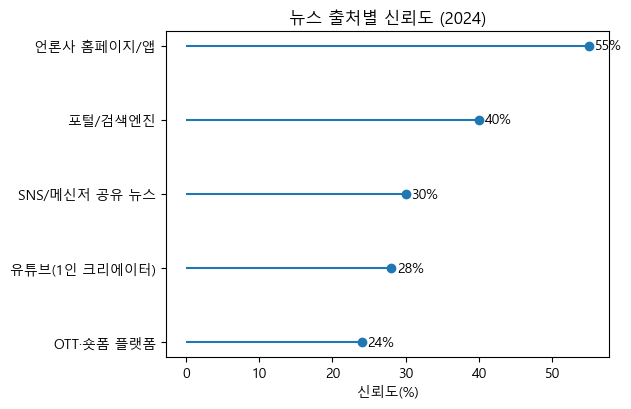

In [35]:
# 3️⃣ 뉴스 출처별 신뢰도 (히트맵 느낌 막대)
df3 = read_csv_any("뉴스출처별_신뢰도_2024.csv").copy()
# print(df3.columns)  # 컬럼 확인용

df3 = df3.sort_values("신뢰도(%)")  # 낮은 순 정렬

y = np.arange(len(df3))
plt.figure(figsize=(6.4, 4.2))
plt.hlines(y=y, xmin=0, xmax=df3["신뢰도(%)"])
plt.plot(df3["신뢰도(%)"], y, "o")  # 색 지정 없이 기본
plt.yticks(y, df3["출처"])
plt.xlabel("신뢰도(%)")
plt.title("뉴스 출처별 신뢰도 (2024)")

for xi, yi in zip(df3["신뢰도(%)"], y):
    plt.text(xi + 0.8, yi, f"{xi:.0f}%", va="center")

plt.tight_layout()
plt.show()